# Importing the Dependencies

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics




# Data Collection and Processing
url = https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

In [24]:
big_mart_data = pd.read_csv("Dataset/BigMartSalesData_Train.csv")
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [26]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [27]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

### Mean (Average)
The **mean** is the sum of all values in a dataset divided by the number of values. It's often referred to as the average. For example, if you have the numbers 2, 4, 6, 8, and 10, the mean would be calculated as:

$$ \text{Mean} = \frac{2 + 4 + 6 + 8 + 10}{5} = 6 $$

### Mode
The **mode** is the value that appears most frequently in a dataset. A dataset can have more than one mode if multiple values appear with the same highest frequency. For example, in the dataset 1, 2, 2, 3, 4, 4, 4, 5, the mode is 4 because it appears the most often.

In [ ]:
big_mart_data['Item_Weight'].mean()
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [33]:
big_mart_data['Outlet_Size'].mode()
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', 
                                                columns='Outlet_Type', 
                                                aggfunc=(lambda x: x.mode()[0]))

print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [37]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [38]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [39]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


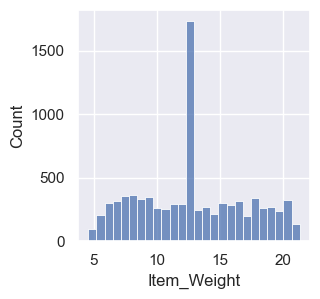

In [44]:
plt.figure(figsize=(3, 3))
sns.histplot(big_mart_data['Item_Weight'])
plt.show()


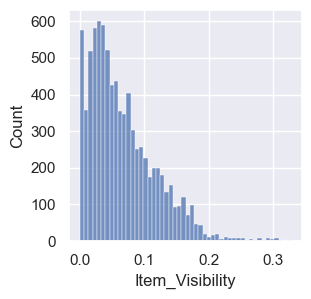

In [45]:
plt.figure(figsize=(3, 3))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()


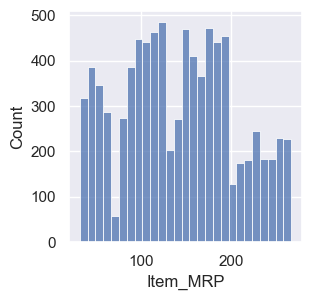

In [47]:
plt.figure(figsize=(3, 3))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

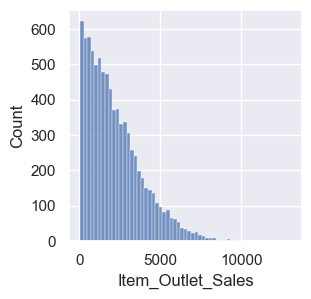

In [51]:
plt.figure(figsize=(3, 3))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

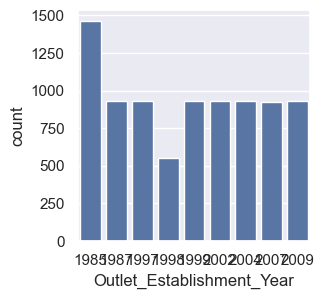

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

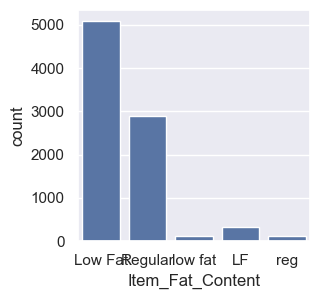

In [53]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'Item_Fat_Content', data = big_mart_data)
plt.show()

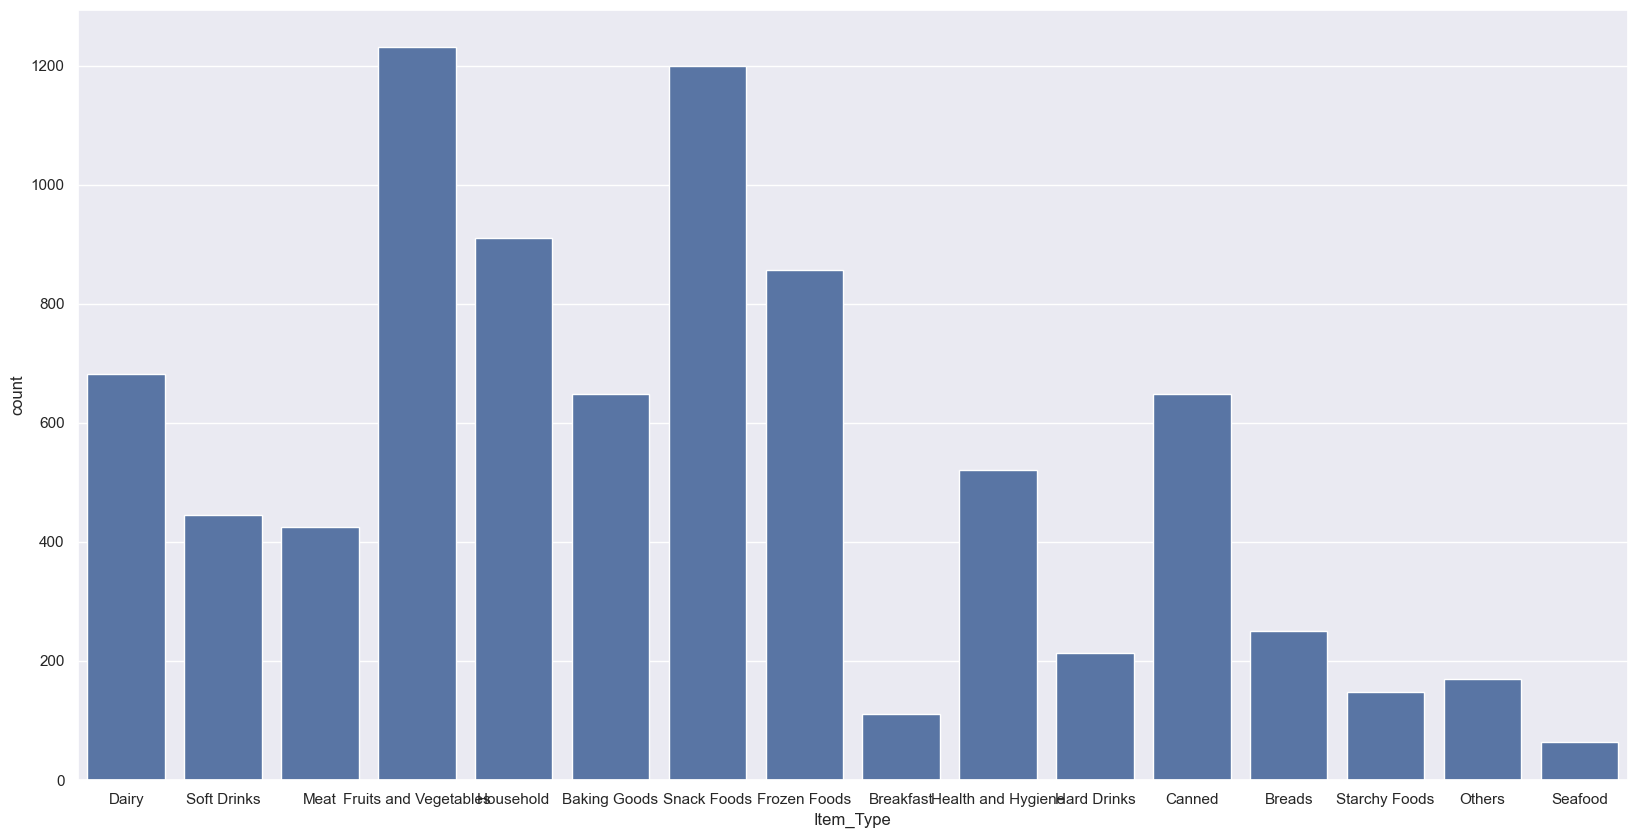

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Item_Type', data = big_mart_data)
plt.show()

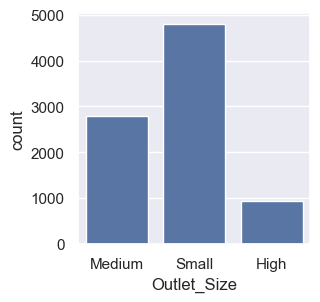

In [60]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'Outlet_Size', data = big_mart_data)
plt.show()

In [63]:
print(set(big_mart_data['Item_Fat_Content']))
# or
big_mart_data['Item_Fat_Content'].value_counts() 

{'Low Fat', 'Regular', 'reg', 'LF', 'low fat'}


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [65]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)
big_mart_data['Item_Fat_Content'].value_counts() 

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Label Encoding 
Label encoding is a technique used to convert categorical labels into numerical values. In scikit-learn, you can use the `LabelEncoder` class from the `sklearn.preprocessing` module to perform label encoding. Here's a quick guide on how to use it:

1. **Import the necessary library**:
   ```python
   from sklearn.preprocessing import LabelEncoder
   ```

2. **Create an instance of `LabelEncoder`**:
   ```python
   le = LabelEncoder()
   ```

3. **Fit the encoder to your data**:
   ```python
   le.fit(['cat', 'dog', 'fish'])
   ```

4. **Transform the labels to numerical values**:
   ```python
   encoded_labels = le.transform(['cat', 'dog', 'fish'])
   # Output: array([0, 1, 2])
   ```

5. **Inverse transform to get the original labels back**:
   ```python
   original_labels = le.inverse_transform([0, 1, 2])
   # Output: array(['cat', 'dog', 'fish'])
   ```

This method is useful for converting categorical data into a format that can be used in machine learning models.

In [67]:
encoder = LabelEncoder()
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [68]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [70]:
x = big_mart_data.drop('Item_Outlet_Sales', axis=1)
y = big_mart_data['Item_Outlet_Sales']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Machine Learning Model Training
## XGBoost: eXtreme Gradient Boosting

XGBoost is a powerful and efficient implementation of gradient boosting for supervised learning tasks. It can be used for both regression and classification problems.

## XGBoost Regressor

The XGBoost Regressor is used to predict continuous target variables. It builds an ensemble of decision trees, where each new tree corrects the errors of the previous ones.

### Mathematical Steps:
1. **Initialize the model** with a constant value (e.g., the mean of the target variable).
2. **Calculate the residuals** (errors) between the actual and predicted values.
3. **Fit a new tree** to the residuals.
4. **Update the model** by adding the predictions from the new tree, scaled by a learning rate.
5. **Repeat** steps 2-4 for a specified number of iterations or until the residuals are minimized.

### Loss Function:
The typical loss function used is the Mean Squared Error (MSE):
$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

## XGBoost Classifier

The XGBoost Classifier is used to predict categorical target variables. It follows a similar process to the regressor but uses a different loss function.

### Mathematical Steps:
1. **Initialize the model** with a constant value (e.g., the log-odds of the target variable).
2. **Calculate the gradients** (partial derivatives of the loss function) for each instance.
3. **Fit a new tree** to the gradients.
4. **Update the model** by adding the predictions from the new tree, scaled by a learning rate.
5. **Repeat** steps 2-4 for a specified number of iterations or until the gradients are minimized.

### Loss Function:
For binary classification, the log loss function is commonly used:
$$
L = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

## Key Concepts

- **Gradient Boosting**: Sequentially adds models to correct errors of the previous models.
- **Loss Function**: Measures how well the model's predictions match the actual values.
- **Learning Rate**: Controls the contribution of each tree to the final model.
- **Regularization**: Prevents overfitting by penalizing complex models.

## Advantages of XGBoost

- **Efficiency**: Highly optimized for speed and performance.
- **Flexibility**: Supports custom objective functions and evaluation metrics.
- **Regularization**: Includes L1 and L2 regularization to prevent overfitting.
- **Scalability**: Can handle large datasets and high-dimensional data.

## Installation

You can install XGBoost using pip:

```bash
pip install xgboost
```

In [74]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

# Evaluation

In [ ]:
# prediction on training data
from sklearn.metrics import r2_score
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score (Train):", r2_train)

R2 Score (Train): 0.9224475179257705


In [ ]:
# prediction on testing data
from sklearn.metrics import r2_score
model.fit(x_test, y_test)
y_pred_test = model.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)
print("R2 squared (Test):", r2_test)

R2 squared (Test): 0.9951692486091173
